In [1]:
import folium
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager,rc

In [5]:
font_name = font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
plt.rcParams['font.size'] = 14
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus']=False

In [6]:
emart_df=pd.read_csv('C:/MartRepository/4Mart/data/Emart_info.csv',encoding='utf-8')

In [7]:
lotte_df=pd.read_csv('C:/MartRepository/4Mart/data/lotte.csv',encoding='utf-8')

In [8]:
home_df=pd.read_csv('C:/MartRepository/4Mart/data/Homeplus_shop_info_loc4.csv',encoding='utf-8')


In [9]:
top_df=pd.read_csv('C:/MartRepository/4Mart/data/topmart_shop_info_loc.csv',encoding='utf-8')


In [10]:
mart_df=pd.concat([lotte_df, emart_df,home_df,top_df],axis=0) 

In [11]:
mart_df.to_csv('./mart.csv',encoding='utf-8',index=False)

In [12]:
mart_df = pd.read_csv('./mart.csv',encoding='utf-8')
mart_df.head()

,store,address,Latitude,Longitude,tel
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500


In [13]:
mart_df['brand']=mart_df['store'].str.split().str[0]

In [14]:
mart_df

,store,address,Latitude,Longitude,tel,brand
0,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,롯데마트
1,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,롯데마트
2,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,롯데마트
3,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,롯데마트
4,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,롯데마트
...,...,...,...,...,...,...
455,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,탑마트
456,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,탑마트
457,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,탑마트
458,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,탑마트


In [16]:
mart_df=mart_df[['brand','store','address','Latitude','Longitude','tel']]
mart_df

,brand,store,address,Latitude,Longitude,tel
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500
...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300
456,탑마트,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000
457,탑마트,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008
458,탑마트,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2


In [17]:
mart_df.to_csv('./mart2.csv',encoding='utf-8',index=False)

<AxesSubplot:xlabel='brand', ylabel='count'>

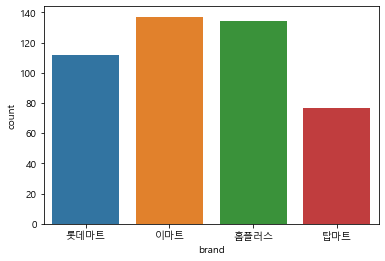

In [18]:
sns.countplot(data=mart_df,x='brand')

In [23]:
mart_df['city']=mart_df['address'].str.split().str[0]
mart_df

,brand,store,address,Latitude,Longitude,tel,city
0,롯데마트,롯데마트 TRU동부산점,부산광역시 기장군 기장읍 기장해안로 147 롯데몰동부산점 3층,35.218819,129.231369,051-922-2500,부산광역시
1,롯데마트,롯데마트 TRU파주점,"경기도 파주시 문발로 302 A블럭 3층(문발동, 롯데프리미엄아울렛)",37.720410,126.693622,031-960-2750,경기도
2,롯데마트,롯데마트 marketD수원점,경기도 수원시 권선구 세화로 134 롯데마트,37.265378,126.995983,031-8067-2500,경기도
3,롯데마트,롯데마트 강변점,서울특별시 광진구 광나루로56길 85 롯데마트,37.534937,127.095709,02-3424-2500,서울특별시
4,롯데마트,롯데마트 거제점,경상남도 거제시 서간도길 9-9 (옥포동),34.888501,128.689184,055-641-2500,경상남도
...,...,...,...,...,...,...,...
455,탑마트,탑마트 서진주점,경상남도 진주시 새평거로 136 (평거동 921),35.181392,128.069798,055)743-6300,경상남도
456,탑마트,탑마트 대구점,대구광역시 중구 중앙대로 66길 20 (효성해링턴 지하),35.862074,128.594685,053)251-5000,대구광역시
457,탑마트,탑마트 물금역점,"경상남도 양산시 물금읍 물금중앙길 18 (구, 물금시장)",35.309926,128.984952,055-387-3008,경상남도
458,탑마트,탑마트 경주용강점,경상북도 경주시 산업로 4348 (용강동),35.870536,129.231939,054)744-5501~2,경상북도


<AxesSubplot:xlabel='city', ylabel='count'>

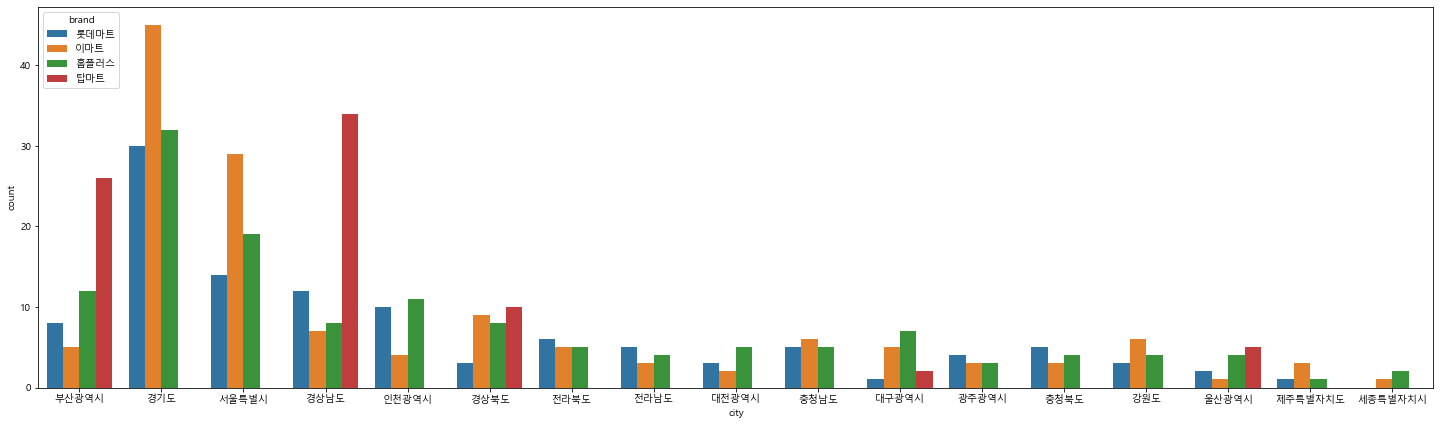

In [33]:
plt.figure(figsize=(25, 7))
sns.countplot(data=mart_df,x='Latitude', hue='brand')

In [57]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
plt.figure(figsize=(15, 10))
sns.scatterplot((mart_df.city=='부산광역시'), x="Latitude", y="Longitude", hue="city")
plt.show()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `Longitude` for parameter `y`

<Figure size 1080x720 with 0 Axes>